# Cancer detection using Support Vector Classification


Import Section 


In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.metrics import accuracy_score,roc_auc_score, f1_score , log_loss, confusion_matrix
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler




In [3]:
print(sklearn.__version__)

1.0.2


Lets work on the cancer dataset

In [4]:
!pip install -q kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!mkdir cancerdataset
!kaggle datasets download -d amandam1/breastcancerdataset
!unzip breastcancerdataset.zip -d cancerdataset

Saving kaggle.json to kaggle.json
  0% 0.00/10.8k [00:00<?, ?B/s]
100% 10.8k/10.8k [00:00<00:00, 10.0MB/s]
Archive:  breastcancerdataset.zip
  inflating: cancerdataset/BRCA.csv  


Lets Load the dataset

In [5]:
cancerdata = pd.read_csv('/content/cancerdataset/BRCA.csv')
cancerdata.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


Lets do some preprocessing

In [6]:
# drop duplicates
print("data before duplicate removal : ",cancerdata.shape[0])
cancerdata = cancerdata.drop_duplicates()
print("data after duplicate remomval : ",cancerdata.shape[0])


data before duplicate removal :  341
data after duplicate remomval :  335


In [7]:
# lets only take few features which are important
cancerdata = cancerdata.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,15]]
cancerdata.head()


,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,Alive
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,Dead
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Alive
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,Alive
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Dead


In [8]:
# null value analysis
print(cancerdata.isnull().sum())
print("data before null remomval : ",cancerdata.shape[0])
cancerdata = cancerdata.dropna()
print("data after null remomval : ",cancerdata.shape[0])
    

Age                1
Gender             1
Protein1           1
Protein2           1
Protein3           1
Protein4           1
Tumour_Stage       1
Histology          1
ER status          1
PR status          1
HER2 status        1
Surgery_type       1
Patient_Status    14
dtype: int64
data before null remomval :  335
data after null remomval :  321


In [9]:
# lets encode the categorical features
X = cancerdata.iloc[:,:-1]
y = cancerdata.iloc[:,-1]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(224, 12)
(97, 12)
(224,)
(97,)


In [11]:
y.shape

(321,)

In [12]:
list(X_train.iloc[:,[0,2,3,4,5]].columns)

['Age', 'Protein1', 'Protein2', 'Protein3', 'Protein4']

In [13]:
features_with_noencoding_X_train = X_train.iloc[:,[0,2,3,4,5]]
columns = list(features_with_noencoding_X_train.columns)
scaler = StandardScaler()
features_with_noencoding_X_train = pd.DataFrame(data = scaler.fit_transform(features_with_noencoding_X_train), columns = columns)
feature_with_ordinal_encoding_X_train = X_train.iloc[:,[6]]
feature_with_one_hot_encoding_X_train = X_train.iloc[:,[1,7,8,9,10,11]]
enc = OneHotEncoder(handle_unknown='ignore')
feature_with_one_hot_encoding_X_train = enc.fit_transform(feature_with_one_hot_encoding_X_train).toarray()
feature_with_one_hot_encoding_X_train = pd.DataFrame(feature_with_one_hot_encoding_X_train,columns = enc.get_feature_names_out())
feature_with_ordinal_encoding_X_train.Tumour_Stage = feature_with_ordinal_encoding_X_train.Tumour_Stage.map({'I':1,"II":2,"III":3})
#print(feature_with_one_hot_encoding_X_train.head())
X_train = pd.concat([features_with_noencoding_X_train.reset_index(drop=True), feature_with_ordinal_encoding_X_train.reset_index(drop=True),feature_with_one_hot_encoding_X_train.reset_index(drop=True)], axis=1)
y_train = y_train.map({"Alive":0,"Dead":1})
X_train.head()

,Age,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Gender_FEMALE,Gender_MALE,Histology_Infiltrating Ductal Carcinoma,Histology_Infiltrating Lobular Carcinoma,Histology_Mucinous Carcinoma,ER status_Positive,PR status_Positive,HER2 status_Negative,HER2 status_Positive,Surgery_type_Lumpectomy,Surgery_type_Modified Radical Mastectomy,Surgery_type_Other,Surgery_type_Simple Mastectomy
0,-1.037302,-1.154966,0.834460,-1.199138,1.259868,2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-0.270957,0.127218,0.394359,-0.814498,0.193888,2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.424226,-0.504627,0.510789,-0.431412,-0.119806,3,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.955193,-1.577642,-0.254230,-0.218889,-0.397162,3,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.347592,-1.341374,-1.827936,2.665444,-0.747556,3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [14]:
features_with_noencoding_X_test = X_test.iloc[:,[0,2,3,4,5]]
columns = list(features_with_noencoding_X_test.columns)
feature_with_ordinal_encoding_X_test = X_test.iloc[:,[6]]
feature_with_one_hot_encoding_X_test = X_test.iloc[:,[1,7,8,9,10,11]]
features_with_noencoding_X_test = pd.DataFrame(data = scaler.transform(features_with_noencoding_X_test), columns = columns)
feature_with_one_hot_encoding_X_test = enc.transform(feature_with_one_hot_encoding_X_test).toarray()
feature_with_one_hot_encoding_X_test = pd.DataFrame(feature_with_one_hot_encoding_X_test,columns = enc.get_feature_names_out())
feature_with_ordinal_encoding_X_test.Tumour_Stage = feature_with_ordinal_encoding_X_test.Tumour_Stage.map({'I':1,"II":2,"III":3})
X_test = pd.concat([features_with_noencoding_X_test.reset_index(drop=True), feature_with_ordinal_encoding_X_test.reset_index(drop=True),feature_with_one_hot_encoding_X_test.reset_index(drop=True)], axis=1)
y_test = y_test.map({"Alive":0,"Dead":1})
X_test.head()

,Age,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Gender_FEMALE,Gender_MALE,Histology_Infiltrating Ductal Carcinoma,Histology_Infiltrating Lobular Carcinoma,Histology_Mucinous Carcinoma,ER status_Positive,PR status_Positive,HER2 status_Negative,HER2 status_Positive,Surgery_type_Lumpectomy,Surgery_type_Modified Radical Mastectomy,Surgery_type_Other,Surgery_type_Simple Mastectomy
0,-0.960667,0.373964,-1.971609,1.573196,1.308276,3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,-0.347592,0.698652,-1.438547,3.444627,1.221179,2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.035580,1.076859,-2.098230,-0.815329,-1.611653,3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.955193,-0.282766,-0.522511,-0.383580,-1.419799,2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.342118,-0.818282,0.916350,-0.421094,-0.028557,2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


# Lets apply SVC on this

Note: Applying SVC not recommended when dataset is large as training time complexity is O(n)^2.


Lets create result table

In [15]:
result_data = pd.DataFrame(data = np.zeros((4,7)),index = ['accuracy','f1_score','roc_auc','log_loss'],columns= ['Linear_SVC', 'Linear_Kernal_SVC','Poly_Kernal_SVC','RBF_Kernal_SVC','Sigmoid_Kernal_SVC','Callable_Kernal_SVC','Nu_SVC'])
result_data

,Linear_SVC,Linear_Kernal_SVC,Poly_Kernal_SVC,RBF_Kernal_SVC,Sigmoid_Kernal_SVC,Callable_Kernal_SVC,Nu_SVC
accuracy,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f1_score,0.0,0.0,0.0,0.0,0.0,0.0,0.0
roc_auc,0.0,0.0,0.0,0.0,0.0,0.0,0.0
log_loss,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# lets start with linear SVC

In [16]:
from sklearn.svm import LinearSVC 
from sklearn.model_selection import GridSearchCV
# using no parameters due to time complexity issue
parameters = [{'penalty': ['l1','l2'], 'loss':['squared_hinge'] , 'C': np.random.uniform(low=0.0, high=3.0, size=5)},{'penalty': ['l2'], 'loss':['hinge'] , 'C': np.random.uniform(low=0.0, high=3.0, size=5)}]
#parameters = {}
linearsvc_gridsearch = GridSearchCV(LinearSVC(dual = False),parameters, scoring = 'f1', cv = 5, return_train_score = True)
linearsvc_gridsearch.fit(X_train,y_train.ravel())

GridSearchCV(cv=5, estimator=LinearSVC(dual=False),
             param_grid=[{'C': array([0.77853163, 0.9678086 , 2.10711831, 0.82435787, 0.36692252]),
                          'loss': ['squared_hinge'], 'penalty': ['l1', 'l2']},
                         {'C': array([0.31370114, 0.75797575, 0.42707798, 0.97253084, 0.88206985]),
                          'loss': ['hinge'], 'penalty': ['l2']}],
             return_train_score=True, scoring='f1')

In [17]:
linearsvc_gridsearch.best_estimator_

LinearSVC(C=0.7785316266953561, dual=False, penalty='l1')

In [18]:
y_pred_linear_svc = linearsvc_gridsearch.predict(X_test)
#y_prob_linear_svc = linearsvc_gridsearch.predict_proba(X_test)

In [19]:
def result_check (type, y_true,y_pred,y_prob = []):
  result_data[type]['accuracy'] = accuracy_score(y_true, y_pred)
  result_data[type]['f1_score'] = f1_score(y_true, y_pred)
  if y_prob == []:
    result_data[type]['roc_auc'] = np.nan
    result_data[type]['log_loss'] = np.nan
  else:
    result_data[type]['roc_auc'] = roc_auc_score(y_true, y_prob[:, 1])
    result_data[type]['log_loss'] = log_loss(y_true, y_prob[:, 1])
  print("accuracy score : " , accuracy_score(y_test, y_pred))
  print("f1_Score : " ,f1_score(y_test, y_pred))
  sns.heatmap(confusion_matrix(y_test, y_pred),annot = True, cmap = 'Blues_r')
  if y_prob == []:
    print("roc_auc_score :" , 'Not Available')
    print("log_loss :" , 'Not Available')
  else:
    print("roc_auc_score :" , roc_auc_score(y_test, y_prob[:, 1]))
    print("log_loss :" , log_loss(y_test, y_prob[:, 1]))
  return result_data

accuracy score :  0.7938144329896907
f1_Score :  0.0
roc_auc_score : Not Available
log_loss : Not Available


,Linear_SVC,Linear_Kernal_SVC,Poly_Kernal_SVC,RBF_Kernal_SVC,Sigmoid_Kernal_SVC,Callable_Kernal_SVC,Nu_SVC
accuracy,0.793814,0.0,0.0,0.0,0.0,0.0,0.0
f1_score,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
roc_auc,NaN,0.0,0.0,0.0,0.0,0.0,0.0
log_loss,NaN,0.0,0.0,0.0,0.0,0.0,0.0


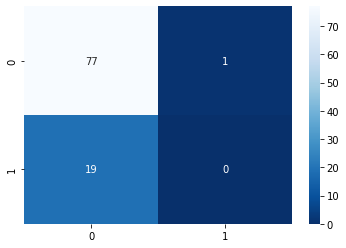

In [20]:
result_check('Linear_SVC',y_test,y_pred_linear_svc)
result_data

# now lets use linear kernal svm

In [21]:
from sklearn.svm import SVC
parameters = {'C': np.random.uniform(low=0.0, high=3.0, size=10)}
linearkernalsvc_gridsearch = GridSearchCV(SVC(kernel = 'linear',probability=True),parameters, scoring = 'f1', cv = 5, return_train_score = True)
linearkernalsvc_gridsearch.fit(X_train,y_train.ravel())




GridSearchCV(cv=5, estimator=SVC(kernel='linear', probability=True),
             param_grid={'C': array([1.0238552 , 2.35081778, 1.16544526, 0.56838642, 2.90122146,
       2.65040376, 1.97480884, 2.00562638, 1.95263926, 1.65877394])},
             return_train_score=True, scoring='f1')

In [22]:
linearkernalsvc_gridsearch.best_estimator_

SVC(C=1.023855197945987, kernel='linear', probability=True)

accuracy score :  0.7938144329896907
f1_Score :  0.0
roc_auc_score : 0.46761133603238864
log_loss : 0.4953208461001555


,Linear_SVC,Linear_Kernal_SVC,Poly_Kernal_SVC,RBF_Kernal_SVC,Sigmoid_Kernal_SVC,Callable_Kernal_SVC,Nu_SVC
accuracy,0.793814,0.793814,0.0,0.0,0.0,0.0,0.0
f1_score,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
roc_auc,NaN,0.467611,0.0,0.0,0.0,0.0,0.0
log_loss,NaN,0.495321,0.0,0.0,0.0,0.0,0.0


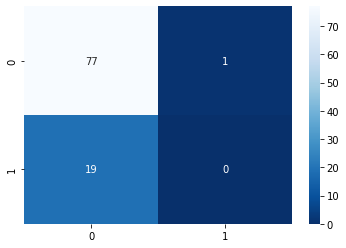

In [23]:
y_pred_linear_kernel_svc = linearkernalsvc_gridsearch.predict(X_test)
y_prob_linear_kernel_svc = linearkernalsvc_gridsearch.predict_proba(X_test)
result_check('Linear_Kernal_SVC',y_test,y_pred_linear_svc,y_prob_linear_kernel_svc)
result_data

# now lets use poly kernal svm

In [24]:
from sklearn.svm import SVC
parameters = {'C': np.random.uniform(low=0.0, high=3.0, size=10),'degree': range(1, 11)}
polykernalsvc_gridsearch = GridSearchCV(SVC(kernel = 'poly',probability=True),parameters, scoring = 'f1', cv = 5, return_train_score = True)
polykernalsvc_gridsearch.fit(X_train,y_train.ravel())

GridSearchCV(cv=5, estimator=SVC(kernel='poly', probability=True),
             param_grid={'C': array([0.69110535, 0.16181089, 2.47487056, 1.24725433, 0.35734436,
       2.08877298, 1.05627883, 1.25463086, 2.51235202, 0.56092228]),
                         'degree': range(1, 11)},
             return_train_score=True, scoring='f1')

In [25]:
polykernalsvc_gridsearch.best_estimator_

SVC(C=0.6911053476825113, degree=6, kernel='poly', probability=True)

accuracy score :  0.7319587628865979
f1_Score :  0.0
roc_auc_score : 0.49865047233468285
log_loss : 0.49519684720400303


,Linear_SVC,Linear_Kernal_SVC,Poly_Kernal_SVC,RBF_Kernal_SVC,Sigmoid_Kernal_SVC,Callable_Kernal_SVC,Nu_SVC
accuracy,0.793814,0.793814,0.731959,0.0,0.0,0.0,0.0
f1_score,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
roc_auc,NaN,0.467611,0.498650,0.0,0.0,0.0,0.0
log_loss,NaN,0.495321,0.495197,0.0,0.0,0.0,0.0


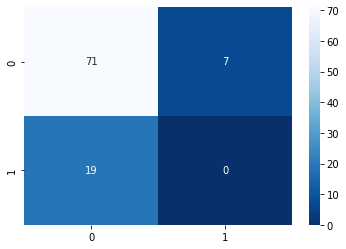

In [26]:
y_pred_poly_kernel_svc = polykernalsvc_gridsearch.predict(X_test)
y_prob_poly_kernel_svc = polykernalsvc_gridsearch.predict_proba(X_test)
result_check('Poly_Kernal_SVC',y_test,y_pred_poly_kernel_svc,y_prob_poly_kernel_svc)
result_data

# now lets use rbf kernal svm

In [27]:
from sklearn.svm import SVC
parameters = {'C': np.random.uniform(low=0.0, high=3.0, size=10),'degree': range(1, 11)}
kernalsvc_gridsearch = GridSearchCV(SVC(kernel = 'rbf',probability=True),parameters, scoring = 'f1', cv = 5, return_train_score = True)
kernalsvc_gridsearch.fit(X_train,y_train.ravel())

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': array([1.04031684, 2.27169143, 0.73344782, 2.00937065, 0.74405554,
       1.96920707, 0.40773179, 2.85144931, 0.17420972, 0.05747354]),
                         'degree': range(1, 11)},
             return_train_score=True, scoring='f1')

In [28]:
kernalsvc_gridsearch.best_estimator_

SVC(C=1.0403168356965167, degree=1, probability=True)

accuracy score :  0.8041237113402062
f1_Score :  0.0
roc_auc_score : 0.45209176788124156
log_loss : 0.4963934632986387


,Linear_SVC,Linear_Kernal_SVC,Poly_Kernal_SVC,RBF_Kernal_SVC,Sigmoid_Kernal_SVC,Callable_Kernal_SVC,Nu_SVC
accuracy,0.793814,0.793814,0.731959,0.804124,0.0,0.0,0.0
f1_score,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
roc_auc,NaN,0.467611,0.498650,0.452092,0.0,0.0,0.0
log_loss,NaN,0.495321,0.495197,0.496393,0.0,0.0,0.0


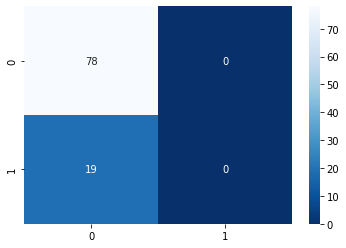

In [29]:
y_pred_kernel_svc = kernalsvc_gridsearch.predict(X_test)
y_prob_kernel_svc = kernalsvc_gridsearch.predict_proba(X_test)
result_check('RBF_Kernal_SVC',y_test,y_pred_kernel_svc,y_prob_kernel_svc)
result_data

# now lets use sigmoid kernal svm

In [30]:
parameters = {'C': np.random.uniform(low=0.0, high=3.0, size=10),'degree': range(1, 11)}
kernalsvc_gridsearch = GridSearchCV(SVC(kernel = 'sigmoid',probability=True),parameters, scoring = 'f1', cv = 5, return_train_score = True)
kernalsvc_gridsearch.fit(X_train,y_train.ravel())

GridSearchCV(cv=5, estimator=SVC(kernel='sigmoid', probability=True),
             param_grid={'C': array([2.02431869, 1.24617114, 0.41012108, 1.98721035, 1.61787757,
       1.03423918, 1.86703443, 1.30583298, 0.27283377, 0.78649752]),
                         'degree': range(1, 11)},
             return_train_score=True, scoring='f1')

In [31]:
kernalsvc_gridsearch.best_estimator_

SVC(C=1.8670344326297403, degree=1, kernel='sigmoid', probability=True)

accuracy score :  0.7216494845360825
f1_Score :  0.12903225806451615
roc_auc_score : 0.40350877192982454
log_loss : 0.4994693032136307


,Linear_SVC,Linear_Kernal_SVC,Poly_Kernal_SVC,RBF_Kernal_SVC,Sigmoid_Kernal_SVC,Callable_Kernal_SVC,Nu_SVC
accuracy,0.793814,0.793814,0.731959,0.804124,0.721649,0.0,0.0
f1_score,0.000000,0.000000,0.000000,0.000000,0.129032,0.0,0.0
roc_auc,NaN,0.467611,0.498650,0.452092,0.403509,0.0,0.0
log_loss,NaN,0.495321,0.495197,0.496393,0.499469,0.0,0.0


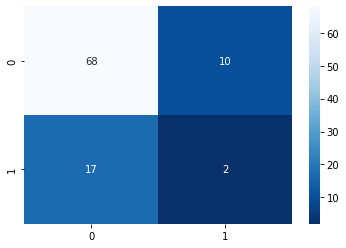

In [32]:
y_pred_kernel_svc = kernalsvc_gridsearch.predict(X_test)
y_prob_kernel_svc = kernalsvc_gridsearch.predict_proba(X_test)
result_check('Sigmoid_Kernal_SVC',y_test,y_pred_kernel_svc,y_prob_kernel_svc)
result_data

# now lets use custom kernal svm

In [33]:
def custom_kernel(X, Y):

  """ We create a custom kernel:
               
  k(X, Y) = X * Y.T
               
  """
  return np.dot(X, Y.T)
parameters = {'C': np.random.uniform(low=0.0, high=3.0, size=10),'degree': range(1, 11)}
kernalsvc_gridsearch = GridSearchCV(SVC(kernel = custom_kernel,probability=True),parameters, scoring = 'f1', cv = 5, return_train_score = True)
kernalsvc_gridsearch.fit(X_train,y_train.ravel())

GridSearchCV(cv=5,
             estimator=SVC(kernel=<function custom_kernel at 0x7f6dff6f3a70>,
                           probability=True),
             param_grid={'C': array([1.52865919, 2.35649724, 1.63426588, 2.11056069, 1.02069207,
       2.34815844, 0.29388426, 2.8967004 , 2.18132794, 2.63055692]),
                         'degree': range(1, 11)},
             return_train_score=True, scoring='f1')

In [34]:
kernalsvc_gridsearch.best_estimator_

SVC(C=1.5286591931653, degree=1,
    kernel=<function custom_kernel at 0x7f6dff6f3a70>, probability=True)

accuracy score :  0.8041237113402062
f1_Score :  0.0
roc_auc_score : 0.3873144399460189
log_loss : 0.49532994784827505


,Linear_SVC,Linear_Kernal_SVC,Poly_Kernal_SVC,RBF_Kernal_SVC,Sigmoid_Kernal_SVC,Callable_Kernal_SVC,Nu_SVC
accuracy,0.793814,0.793814,0.731959,0.804124,0.721649,0.804124,0.0
f1_score,0.000000,0.000000,0.000000,0.000000,0.129032,0.000000,0.0
roc_auc,NaN,0.467611,0.498650,0.452092,0.403509,0.387314,0.0
log_loss,NaN,0.495321,0.495197,0.496393,0.499469,0.495330,0.0


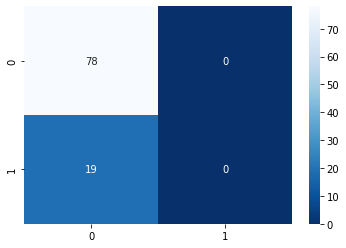

In [35]:
y_pred_kernel_svc = kernalsvc_gridsearch.predict(X_test)
y_prob_kernel_svc = kernalsvc_gridsearch.predict_proba(X_test)
result_check('Callable_Kernal_SVC',y_test,y_pred_kernel_svc,y_prob_kernel_svc)
result_data

# lets use NU-SVC

In [36]:
from sklearn.svm import NuSVC 
parameters = {'nu': np.random.uniform(low=0.0000001, high=1.0, size=10),'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],'degree': range(1, 11) }
kernalsvc_gridsearch = GridSearchCV(NuSVC(probability=True),parameters, scoring = 'f1', cv = 5, return_train_score = True)
kernalsvc_gridsearch.fit(X_train,y_train.ravel())



GridSearchCV(cv=5, estimator=NuSVC(probability=True),
             param_grid={'degree': range(1, 11),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'nu': array([0.95951217, 0.06930142, 0.58877096, 0.24691828, 0.6177733 ,
       0.83013542, 0.39602274, 0.22384685, 0.00833447, 0.73450854])},
             return_train_score=True, scoring='f1')

In [37]:
kernalsvc_gridsearch.best_estimator_

NuSVC(degree=1, kernel='sigmoid', nu=0.008334473768797946, probability=True)

accuracy score :  0.35051546391752575
f1_Score :  0.24096385542168675
roc_auc_score : 0.4311740890688259
log_loss : 0.5000366283603943


,Linear_SVC,Linear_Kernal_SVC,Poly_Kernal_SVC,RBF_Kernal_SVC,Sigmoid_Kernal_SVC,Callable_Kernal_SVC,Nu_SVC
accuracy,0.793814,0.793814,0.731959,0.804124,0.721649,0.804124,0.350515
f1_score,0.000000,0.000000,0.000000,0.000000,0.129032,0.000000,0.240964
roc_auc,NaN,0.467611,0.498650,0.452092,0.403509,0.387314,0.431174
log_loss,NaN,0.495321,0.495197,0.496393,0.499469,0.495330,0.500037


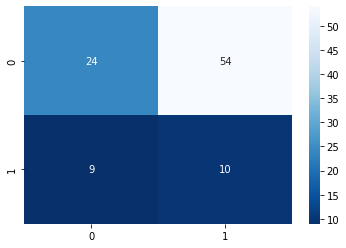

In [38]:
y_pred_kernel_svc = kernalsvc_gridsearch.predict(X_test)
y_prob_kernel_svc = kernalsvc_gridsearch.predict_proba(X_test)
result_check('Nu_SVC',y_test,y_pred_kernel_svc,y_prob_kernel_svc)
result_data